<a href="https://colab.research.google.com/github/racoonjonny/Speed_Estimation_LSTM/blob/main/Data_Generation_(speed_estimation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RNN을 이용한 speed estimation 모델 만들기

# 1. 데이터 로드 및 분포 확인

# 2. 데이터 전처리

# 3. Feature 데이터 생성

# 4. RNN 모델 구축 및 학습

## 1. 데이터 로드

In [ ]:
# 1. 데이터 로드
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

ABS_Off_df_Ice = pd.read_csv('./02_ABS_off_mu_is_0.2.csv')
ABS_Off_df_Snow = pd.read_csv('./02_ABS_off_mu_is_0.35.csv')
ABS_Off_df_Wet = pd.read_csv('./02_ABS_off_mu_is_0.55.csv')
ABS_Off_df_normal = pd.read_csv('./02_ABS_off_mu_is_0.75.csv')
ABS_Off_df_Dry = pd.read_csv('./02_ABS_off_mu_is_0.90.csv')

ABS_On_df_Ice = pd.read_csv('./02_ABS_on_mu_is_0.2.csv')
ABS_On_df_Snow = pd.read_csv('./02_ABS_on_mu_is_0.3.csv')
ABS_On_df_Wet = pd.read_csv('./02_ABS_on_mu_is_0.5.csv')
ABS_On_df_normal = pd.read_csv('./02_ABS_on_mu_is_0.7.csv')
ABS_On_df_Dry = pd.read_csv('./02_ABS_on_mu_is_0.85.csv')


ABS_On_df_Ice.describe()

,Vw,Ax,Aw,Vx,ABS,Vx_kalman
count,120001.000000,120001.000000,120001.000000,120001.000000,120001.0,120001.000000
mean,39.848013,0.012796,0.062909,11.910690,1.0,12.022761
std,32.895206,1.199248,9.237744,8.381154,0.0,8.443272
min,-0.442092,-3.487733,-65.670462,-0.151341,1.0,-0.252395
25%,8.245719,-1.048764,-0.648843,5.008151,1.0,4.970363
50%,23.927569,0.398309,-0.027088,11.132560,1.0,11.173127
75%,76.199182,0.957209,0.194473,18.633539,1.0,18.758250
max,77.479295,2.845024,38.341410,37.844103,1.0,38.491933


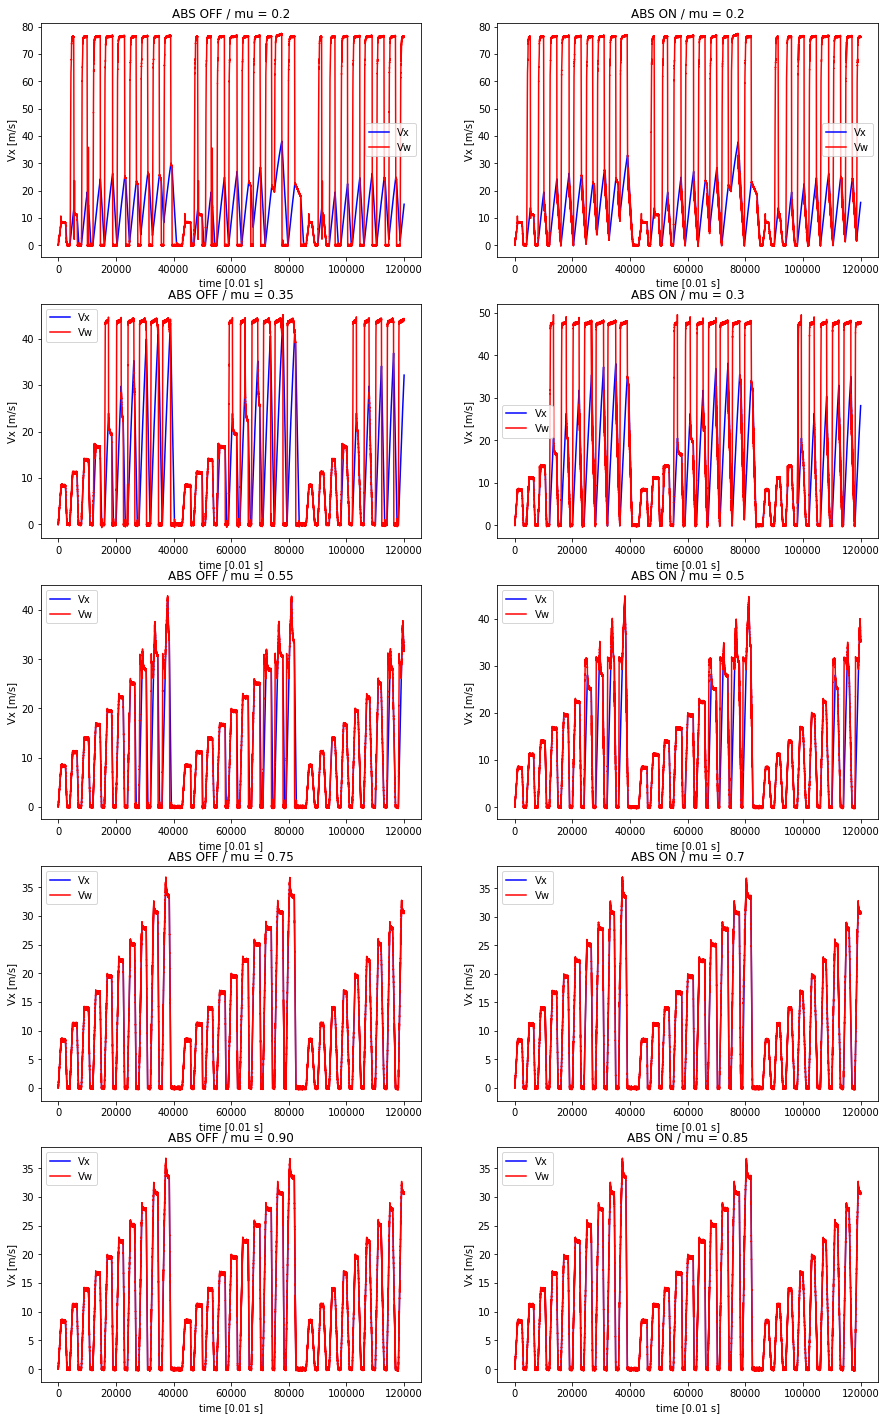

In [ ]:
# 1-2.훈련 데이터 분포 확인
plt.figure(figsize = (15,25))

plt.grid()

plt.subplot(5,2,1)
plt.title('ABS OFF / mu = 0.2')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_Off_df_Ice['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_Off_df_Ice['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,3)
plt.title('ABS OFF / mu = 0.35')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_Off_df_Snow['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_Off_df_Snow['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,5)
plt.title('ABS OFF / mu = 0.55')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_Off_df_Wet['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_Off_df_Wet['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,7)
plt.title('ABS OFF / mu = 0.75')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_Off_df_normal['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_Off_df_normal['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,9)
plt.title('ABS OFF / mu = 0.90')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_Off_df_Dry['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_Off_df_Dry['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,2)
plt.title('ABS ON / mu = 0.2')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_On_df_Ice['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_On_df_Ice['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,4)
plt.title('ABS ON / mu = 0.3')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_On_df_Snow['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_On_df_Snow['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,6)
plt.title('ABS ON / mu = 0.5')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_On_df_Wet['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_On_df_Wet['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,8)
plt.title('ABS ON / mu = 0.7')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_On_df_normal['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_On_df_normal['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,10)
plt.title('ABS ON / mu = 0.85')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(ABS_On_df_Dry['Vx'], label = 'Vx', color = 'b')
plt.plot(ABS_On_df_Dry['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.show()

### 2. 데이터 전처리

In [ ]:
# 2. 데이터 전처리
# 2-1. 음수값의 속도 0으로 처리 
# Vw 나 Vx 는 0보다 작은 경우 0으로 바꿔줘야 함 (데이터 얻을 때 임의로 노이즈 추가해준 부분))

def make_below_zero_to_zero(data):
  for i in range(len(data)):
    if data['Vx'][i] < 0:
      data['Vx'][i] = 0
    
    if data['Vw'][i] < 0:
      data['Vw'][i] = 0


make_below_zero_to_zero(ABS_Off_df_Ice)
make_below_zero_to_zero(ABS_Off_df_Snow)
make_below_zero_to_zero(ABS_Off_df_Wet)
make_below_zero_to_zero(ABS_Off_df_normal)
make_below_zero_to_zero(ABS_Off_df_Dry)
make_below_zero_to_zero(ABS_On_df_Ice)
make_below_zero_to_zero(ABS_On_df_Snow)
make_below_zero_to_zero(ABS_On_df_Wet)
make_below_zero_to_zero(ABS_On_df_normal)
make_below_zero_to_zero(ABS_On_df_Dry)

# 0으로 처리 됫는지 확인
ABS_On_df_Snow.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Vw,Ax,Aw,Vx,ABS,Vx_kalman
count,120001.000000,120001.000000,120001.000000,120001.000000,120001.0,120001.000000
mean,22.274531,0.023109,0.039324,12.146905,1.0,12.236508
std,19.586249,1.565333,4.887257,10.176720,0.0,10.282501
min,0.000000,-4.360306,-30.479788,0.000000,1.0,-0.187376
25%,4.243605,-0.688371,-0.433874,3.009516,1.0,3.002450
50%,13.964530,0.366198,-0.022847,10.806815,1.0,10.878445
75%,47.388964,1.275866,0.140264,19.097516,1.0,19.238214
max,49.524361,3.126570,34.565428,38.146036,1.0,38.887250


In [ ]:
# 2-2 새로운 열 추가. (추정 모델 성능 향상을 위함.)
Alpha = pd.DataFrame(ABS_Off_df_Ice['Ax'] - ABS_Off_df_Ice['Aw'])
Beta = pd.DataFrame(ABS_Off_df_Ice['Vx_kalman'] - ABS_Off_df_Ice['Vw'])
ABS_Off_df_Ice['Alpha'] = Alpha
ABS_Off_df_Ice['Beta'] = Beta

Alpha = pd.DataFrame(ABS_Off_df_Snow['Ax'] - ABS_Off_df_Snow['Aw'])
Beta = pd.DataFrame(ABS_Off_df_Snow['Vx_kalman'] - ABS_Off_df_Snow['Vw'])
ABS_Off_df_Snow['Alpha'] = Alpha
ABS_Off_df_Snow['Beta'] = Beta

Alpha = pd.DataFrame(ABS_Off_df_Wet['Ax'] - ABS_Off_df_Wet['Aw'])
Beta = pd.DataFrame(ABS_Off_df_Wet['Vx_kalman'] - ABS_Off_df_Wet['Vw'])
ABS_Off_df_Wet['Alpha'] = Alpha
ABS_Off_df_Wet['Beta'] = Beta

Alpha = pd.DataFrame(ABS_Off_df_normal['Ax'] - ABS_Off_df_normal['Aw'])
Beta = pd.DataFrame(ABS_Off_df_normal['Vx_kalman'] - ABS_Off_df_normal['Vw'])
ABS_Off_df_normal['Alpha'] = Alpha
ABS_Off_df_normal['Beta'] = Beta

Alpha = pd.DataFrame(ABS_Off_df_Dry['Ax'] - ABS_Off_df_Dry['Aw'])
Beta = pd.DataFrame(ABS_Off_df_Dry['Vx_kalman'] - ABS_Off_df_Dry['Vw'])
ABS_Off_df_Dry['Alpha'] = Alpha
ABS_Off_df_Dry['Beta'] = Beta

Alpha = pd.DataFrame(ABS_On_df_Ice['Ax'] - ABS_On_df_Ice['Aw'])
Beta = pd.DataFrame(ABS_On_df_Ice['Vx_kalman'] - ABS_On_df_Ice['Vw'])
ABS_On_df_Ice['Alpha'] = Alpha
ABS_On_df_Ice['Beta'] = Beta

Alpha = pd.DataFrame(ABS_On_df_Snow['Ax'] - ABS_On_df_Snow['Aw'])
Beta = pd.DataFrame(ABS_On_df_Snow['Vx_kalman'] - ABS_On_df_Snow['Vw'])
ABS_On_df_Snow['Alpha'] = Alpha
ABS_On_df_Snow['Beta'] = Beta

Alpha = pd.DataFrame(ABS_On_df_Wet['Ax'] - ABS_On_df_Wet['Aw'])
Beta = pd.DataFrame(ABS_On_df_Wet['Vx_kalman'] - ABS_On_df_Wet['Vw'])
ABS_On_df_Wet['Alpha'] = Alpha
ABS_On_df_Wet['Beta'] = Beta

Alpha = pd.DataFrame(ABS_On_df_normal['Ax'] - ABS_On_df_normal['Aw'])
Beta = pd.DataFrame(ABS_On_df_normal['Vx_kalman'] - ABS_On_df_normal['Vw'])
ABS_On_df_normal['Alpha'] = Alpha
ABS_On_df_normal['Beta'] = Beta

Alpha = pd.DataFrame(ABS_On_df_Dry['Ax'] - ABS_On_df_Dry['Aw'])
Beta = pd.DataFrame(ABS_On_df_Dry['Vx_kalman'] - ABS_On_df_Dry['Vw'])
ABS_On_df_Dry['Alpha'] = Alpha
ABS_On_df_Dry['Beta'] = Beta

ABS_On_df_Dry

,Vw,Ax,Aw,Vx,ABS,Vx_kalman,Alpha,Beta
0,0.000000,0.000000,0.000000,0.000000,1,0.005377,0.000000,0.005377
1,0.053767,0.537667,0.053767,0.001293,1,0.015889,0.483900,-0.037878
2,0.040966,1.051212,0.040966,0.006404,1,0.154150,1.010246,0.113184
3,0.372801,0.269715,0.372801,0.014039,1,0.161273,-0.103086,-0.211527
4,0.095535,0.712368,0.095535,0.023312,1,0.170185,0.616833,0.074651
...,...,...,...,...,...,...,...,...
119996,30.497484,0.863971,-0.304433,30.603887,1,30.588507,1.168404,0.091022
119997,30.639965,0.847675,-0.017442,30.603694,1,30.575833,0.865116,-0.064132
119998,30.548146,0.399123,-0.220011,30.603502,1,30.633670,0.619134,0.085524
119999,30.719929,0.817400,0.169174,30.603310,1,30.641454,0.648225,-0.078475


In [ ]:
# 2-2. 모든 데이터를 합침. (정규화를 같은 기준상에서 하기 위함)
df_integrated = pd.concat([ABS_Off_df_Ice, ABS_Off_df_Snow, ABS_Off_df_Wet, ABS_Off_df_normal, \
                           ABS_Off_df_Dry, ABS_On_df_Ice, ABS_On_df_Snow, ABS_On_df_Wet, ABS_On_df_normal, ABS_On_df_Dry])
print(df_integrated)

               Vw        Ax        Aw  ...  Vx_kalman     Alpha      Beta
0        0.000000  0.000000  0.000000  ...   0.005377  0.000000  0.005377
1        0.053767  0.537667  0.053767  ...   0.015889  0.483900 -0.037878
2        0.040966  1.051212  0.040966  ...   0.154620  1.010246  0.113655
3        0.374180  0.260440  0.374180  ...   0.161613 -0.113740 -0.212567
4        0.097806  0.699237  0.097806  ...   0.170345  0.601430  0.072539
...           ...       ...       ...  ...        ...       ...       ...
119996  30.497484  0.863971 -0.304433  ...  30.588507  1.168404  0.091022
119997  30.639965  0.847675 -0.017442  ...  30.575833  0.865116 -0.064132
119998  30.548146  0.399123 -0.220011  ...  30.633670  0.619134  0.085524
119999  30.719929  0.817400  0.169174  ...  30.641454  0.648225 -0.078475
120000  30.591811  0.778413  0.129714  ...  30.649451  0.648698  0.057640

[1200010 rows x 8 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

MinMax_scaler = MinMaxScaler()
MaxABS_scaler = MaxAbsScaler()

# 정규 화 대상 column 정의
Norm_scale_cols = ['Vw', 'Vx', 'Ax', 'Aw', 'ABS', 'Vx_kalman', 'Alpha', 'Beta']
MinMax_cols = ['Vw', 'Vx', 'ABS', 'Vx_kalman']
MaxABS_cols = ['Ax', 'Aw', 'Alpha', 'Beta']


MinMax_scaled_df = pd.DataFrame(MinMax_scaler.fit_transform(df_integrated[MinMax_cols]))
MinMax_scaled_df.rename(columns={0:'Vw', 1:'Vx', 2:'ABS', 3:'Vx_kalman'}, inplace=True)

MaxABS_scaled_df = pd.DataFrame(MaxABS_scaler.fit_transform(df_integrated[MaxABS_cols]))
MaxABS_scaled_df.rename(columns={0:'Ax', 1:'Aw', 2:'Alpha', 3:'Beta'}, inplace=True)


scaled_df = pd.DataFrame(pd.concat([MinMax_scaled_df, MaxABS_scaled_df], axis = 1))


print(scaled_df)


               Vw        Vx  ABS  ...        Aw     Alpha      Beta
0        0.000000  0.000000  0.0  ...  0.000000  0.000000  0.000076
1        0.000694  0.000029  0.0  ...  0.000701  0.006402 -0.000537
2        0.000529  0.000144  0.0  ...  0.000534  0.013366  0.001613
3        0.004829  0.000315  0.0  ...  0.004877 -0.001505 -0.003016
4        0.001262  0.000524  0.0  ...  0.001275  0.007957  0.001029
...           ...       ...  ...  ...       ...       ...       ...
1200005  0.393621  0.690235  1.0  ... -0.003968  0.015458  0.001291
1200006  0.395460  0.690231  1.0  ... -0.000227  0.011446 -0.000910
1200007  0.394275  0.690226  1.0  ... -0.002867  0.008191  0.001213
1200008  0.396492  0.690222  1.0  ...  0.002205  0.008576 -0.001113
1200009  0.394839  0.690218  1.0  ...  0.001691  0.008582  0.000818

[1200010 rows x 8 columns]


In [ ]:
scaled_df

,Vw,Vx,ABS,Vx_kalman,Ax,Aw,Alpha,Beta
0,0.000000,0.000000,0.0,0.022178,0.000000,0.000000,0.000000,0.000076
1,0.000694,0.000029,0.0,0.022408,0.066732,0.000701,0.006402,-0.000537
2,0.000529,0.000144,0.0,0.025442,0.130470,0.000534,0.013366,0.001613
3,0.004829,0.000315,0.0,0.025594,0.032324,0.004877,-0.001505,-0.003016
4,0.001262,0.000524,0.0,0.025785,0.086785,0.001275,0.007957,0.001029
...,...,...,...,...,...,...,...,...
1200005,0.393621,0.690235,1.0,0.690886,0.107231,-0.003968,0.015458,0.001291
1200006,0.395460,0.690231,1.0,0.690609,0.105208,-0.000227,0.011446,-0.000910
1200007,0.394275,0.690226,1.0,0.691874,0.049537,-0.002867,0.008191,0.001213
1200008,0.396492,0.690222,1.0,0.692044,0.101451,0.002205,0.008576,-0.001113


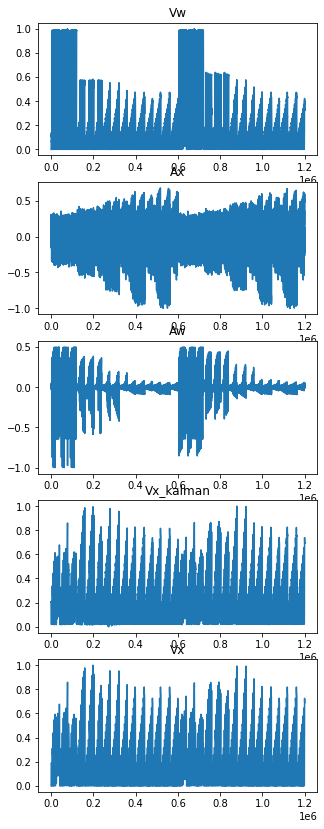

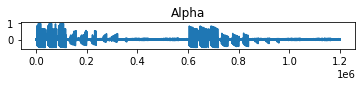

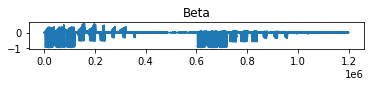

In [ ]:
# 데이터 정규화 확인

plt.figure(figsize = (5,20))

plt.grid()

plt.subplot(711)
plt.title('Vw')
plt.plot(scaled_df['Vw'])

plt.subplot(712)
plt.title('Ax')
plt.plot(scaled_df['Ax'])

plt.subplot(713)
plt.title('Aw')
plt.plot(scaled_df['Aw'])

plt.subplot(714)
plt.title('Vx_kalman')
plt.plot(scaled_df['Vx_kalman'])

plt.subplot(715)
plt.title('Vx')
plt.plot(scaled_df['Vx'])
plt.show()

plt.subplot(716)
plt.title('Alpha')
plt.plot(scaled_df['Alpha'])
plt.show()

plt.subplot(717)
plt.title('Beta')
plt.plot(scaled_df['Beta'])
plt.show()

In [ ]:
# 2-4 정규화된 데이터 다시 원래 데이터들로 나누기
data_len = 120001
scaled_ABS_Off_df_Ice = scaled_df[0:data_len]
scaled_ABS_Off_df_Snow = scaled_df[data_len:2*data_len]
scaled_ABS_Off_df_Wet =  scaled_df[2*data_len:3*data_len]
scaled_ABS_Off_df_normal =  scaled_df[3*data_len:4*data_len]
scaled_ABS_Off_df_Dry =  scaled_df[4*data_len:5*data_len]

scaled_ABS_On_df_Ice =  scaled_df[5*data_len:6*data_len]
scaled_ABS_On_df_Snow =  scaled_df[6*data_len:7*data_len]
scaled_ABS_On_df_Wet =  scaled_df[7*data_len:8*data_len]
scaled_ABS_On_df_normal =  scaled_df[8*data_len:9*data_len]
scaled_ABS_On_df_Dry =  scaled_df[9*data_len:10*data_len]

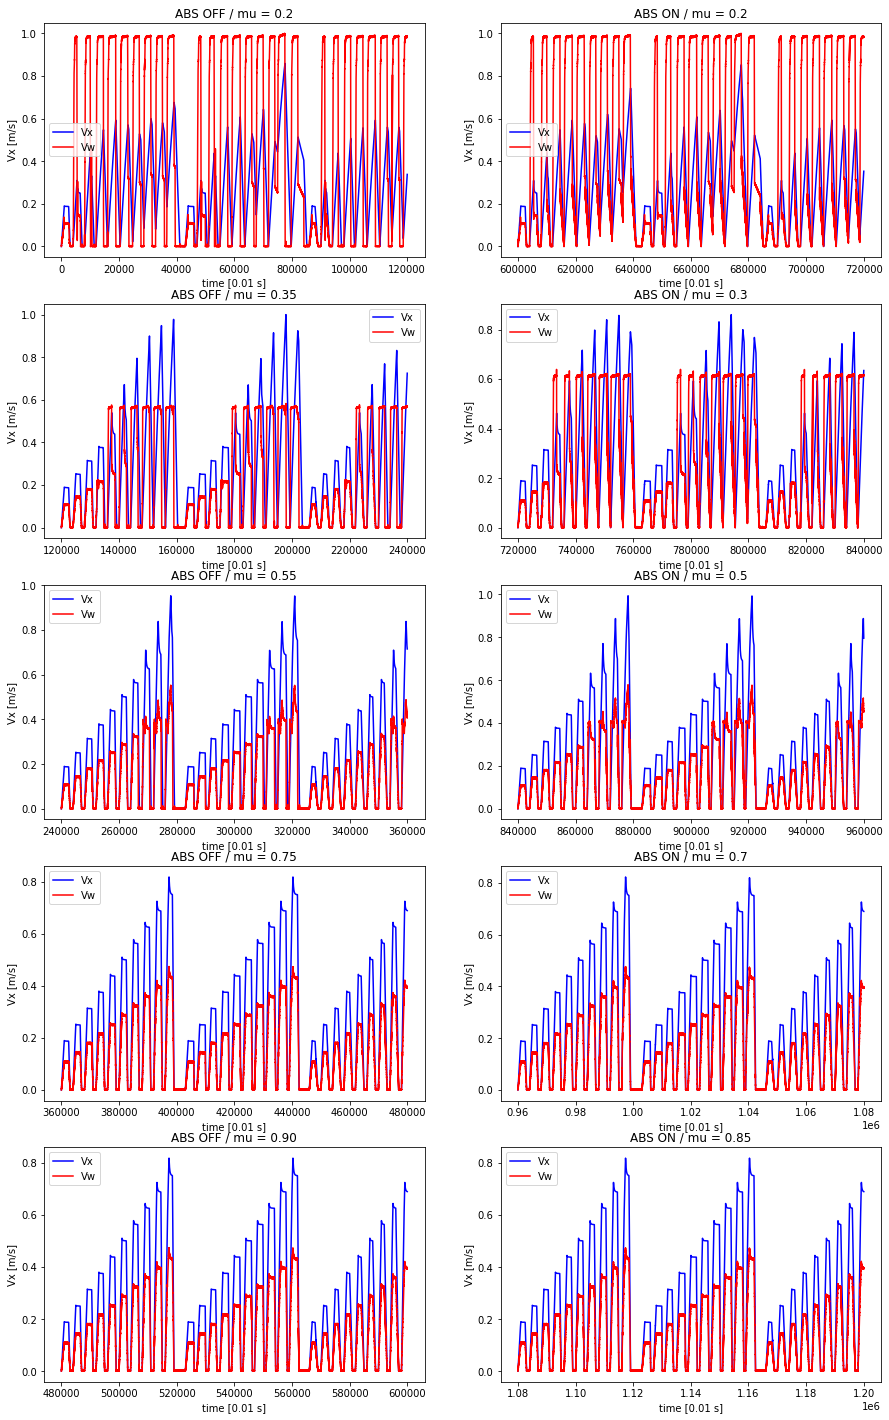

In [ ]:
# 정규화된 데이터 분포 확인
plt.figure(figsize = (15,25))

plt.grid()

plt.subplot(5,2,1)
plt.title('ABS OFF / mu = 0.2')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_Off_df_Ice['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_Off_df_Ice['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,3)
plt.title('ABS OFF / mu = 0.35')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_Off_df_Snow['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_Off_df_Snow['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,5)
plt.title('ABS OFF / mu = 0.55')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_Off_df_Wet['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_Off_df_Wet['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,7)
plt.title('ABS OFF / mu = 0.75')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_Off_df_normal['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_Off_df_normal['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,9)
plt.title('ABS OFF / mu = 0.90')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_Off_df_Dry['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_Off_df_Dry['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,2)
plt.title('ABS ON / mu = 0.2')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_On_df_Ice['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_On_df_Ice['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,4)
plt.title('ABS ON / mu = 0.3')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_On_df_Snow['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_On_df_Snow['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,6)
plt.title('ABS ON / mu = 0.5')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_On_df_Wet['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_On_df_Wet['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,8)
plt.title('ABS ON / mu = 0.7')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_On_df_normal['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_On_df_normal['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.subplot(5,2,10)
plt.title('ABS ON / mu = 0.85')
plt.ylabel('Vx [m/s]')
plt.xlabel('time [0.01 s]')
plt.plot(scaled_ABS_On_df_Dry['Vx'], label = 'Vx', color = 'b')
plt.plot(scaled_ABS_On_df_Dry['Vw'], label = 'Vw', color = 'r')
plt.legend(loc = 'best')

plt.show()

In [ ]:
# 2-5 feature/ label 정의 + numpy로 변환

feature_cols = ['Vw', 'Ax', 'Aw', 'ABS','Vx_kalman', 'Alpha', 'Beta']
label_cols = ['Vx']

label_ABS_Off_df_Ice =(pd.DataFrame(scaled_ABS_Off_df_Ice, columns = label_cols)).to_numpy()
feature_ABS_Off_df_Ice = (pd.DataFrame(scaled_ABS_Off_df_Ice, columns = feature_cols)).to_numpy()

label_ABS_Off_df_Snow =(pd.DataFrame(scaled_ABS_Off_df_Snow, columns = label_cols)).to_numpy()
feature_ABS_Off_df_Snow = (pd.DataFrame(scaled_ABS_Off_df_Snow, columns = feature_cols)).to_numpy()

label_ABS_Off_df_Wet = (pd.DataFrame(scaled_ABS_Off_df_Wet, columns = label_cols)).to_numpy()
feature_ABS_Off_df_Wet = (pd.DataFrame(scaled_ABS_Off_df_Wet, columns = feature_cols)).to_numpy()

label_ABS_Off_df_Normal = (pd.DataFrame(scaled_ABS_Off_df_normal, columns = label_cols)).to_numpy()
feature_ABS_Off_df_Normal = (pd.DataFrame(scaled_ABS_Off_df_normal, columns = feature_cols)).to_numpy()

label_ABS_Off_df_Dry = (pd.DataFrame(scaled_ABS_Off_df_Dry, columns = label_cols)).to_numpy()
feature_ABS_Off_df_Dry = (pd.DataFrame(scaled_ABS_Off_df_Dry, columns = feature_cols)).to_numpy()

label_ABS_On_df_Ice = (pd.DataFrame(scaled_ABS_On_df_Ice, columns = label_cols)).to_numpy()
feature_ABS_On_df_Ice = (pd.DataFrame(scaled_ABS_On_df_Ice, columns = feature_cols)).to_numpy()

label_ABS_On_df_Snow = (pd.DataFrame(scaled_ABS_On_df_Snow, columns = label_cols)).to_numpy()
feature_ABS_On_df_Snow = (pd.DataFrame(scaled_ABS_On_df_Snow, columns = feature_cols)).to_numpy()

label_ABS_On_df_Wet = (pd.DataFrame(scaled_ABS_On_df_Wet, columns = label_cols)).to_numpy()
feature_ABS_On_df_Wet = (pd.DataFrame(scaled_ABS_On_df_Wet, columns = feature_cols)).to_numpy()

label_ABS_On_df_Normal = (pd.DataFrame(scaled_ABS_On_df_normal, columns = label_cols)).to_numpy()
feature_ABS_On_df_Normal = (pd.DataFrame(scaled_ABS_On_df_normal, columns = feature_cols)).to_numpy()

label_ABS_On_df_Dry = (pd.DataFrame(scaled_ABS_On_df_Dry, columns = label_cols)).to_numpy()
feature_ABS_On_df_Dry = (pd.DataFrame(scaled_ABS_On_df_Dry, columns = feature_cols)).to_numpy()





In [ ]:
# 해당 데이터를 편하게 가져다 쓸 수 있게끔 저장.

Vw_max = np.save('./saved_model/Vw_max.npy',df_integrated['Vw'].max())
Vw_min = np.save('./saved_model/Vw_min.npy',df_integrated['Vw'].min())

Vx_max = np.save('./saved_model/Vx_max.npy',df_integrated['Vx'].max())
Vx_min = np.save('./saved_model/Vx_min.npy',df_integrated['Vx'].min())

Vx_kalman_max = np.save('./saved_model/Vx_kalman_max.npy',df_integrated['Vx_kalman'].max())
Vx_kalman_min = np.save('./saved_model/Vx_kalman_min.npy',df_integrated['Vx_kalman'].min())

np.save("./saved_model/label_ABS_Off_df_Ice.npy",label_ABS_Off_df_Ice)
np.save("./saved_model/feature_ABS_Off_df_Ice.npy",feature_ABS_Off_df_Ice)

np.save("./saved_model/label_ABS_Off_df_Snow.npy",label_ABS_Off_df_Snow)
np.save("./saved_model/feature_ABS_Off_df_Snow.npy",feature_ABS_Off_df_Snow)

np.save("./saved_model/label_ABS_Off_df_Wet.npy",label_ABS_Off_df_Wet)
np.save("./saved_model/feature_ABS_Off_df_Wet.npy",feature_ABS_Off_df_Wet)

np.save("./saved_model/label_ABS_Off_df_Normal.npy",label_ABS_Off_df_Normal)
np.save("./saved_model/feature_ABS_Off_df_Normal.npy",feature_ABS_Off_df_Normal)

np.save("./saved_model/label_ABS_Off_df_Dry.npy",label_ABS_Off_df_Dry)
np.save("./saved_model/feature_ABS_Off_df_Dry.npy",feature_ABS_Off_df_Dry)

np.save("./saved_model/label_ABS_On_df_Ice.npy",label_ABS_On_df_Ice)
np.save("./saved_model/feature_ABS_On_df_Ice.npy",feature_ABS_On_df_Ice)

np.save("./saved_model/label_ABS_On_df_Snow.npy",label_ABS_On_df_Snow)
np.save("./saved_model/feature_ABS_On_df_Snow.npy",feature_ABS_On_df_Snow)

np.save("./saved_model/label_ABS_On_df_Wet.npy",label_ABS_On_df_Wet)
np.save("./saved_model/feature_ABS_On_df_Wet.npy",feature_ABS_On_df_Wet)

np.save("./saved_model/label_ABS_On_df_Normal",label_ABS_On_df_Normal)
np.save("./saved_model/feature_ABS_On_df_Normal",feature_ABS_On_df_Normal)

np.save("./saved_model/label_ABS_On_df_Dry",label_ABS_On_df_Dry)
np.save("./saved_model/feature_ABS_On_df_Dry",feature_ABS_On_df_Dry)
